In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
a = pd.read_csv('../Data/accepted.csv')
a.shape

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2260701, 151)

In [4]:
drop = a[a.funded_amnt.isnull()].index
a.drop(drop, axis=0, inplace=True)
a.shape

(2260668, 151)

In [5]:
#No more NaN funded amounts: 
a[a.funded_amnt.isna()].shape

(0, 151)

In [6]:
#Loans with interest rate > 20%:
a = a[a.int_rate >= 20]
a.shape

(185981, 151)

In [7]:
#Types of "loan_status":
a.loan_status.value_counts(dropna=False)

Current                                                69607
Fully Paid                                             65380
Charged Off                                            44764
Late (31-120 days)                                      3982
In Grace Period                                         1412
Late (16-30 days)                                        766
Does not meet the credit policy. Status:Fully Paid        38
Does not meet the credit policy. Status:Charged Off       22
Default                                                   10
Name: loan_status, dtype: int64

In [8]:
#Create new column and map Charged Off = 0, Fully Paid = 1
a['loan_status_bin'] = a['loan_status'].map({'Charged Off':0, 'Fully Paid':1})

In [9]:
#Remove all observations with "Joint Applications". 
a.application_type.value_counts()

Individual    171179
Joint App      14802
Name: application_type, dtype: int64

In [10]:
a = a[a.application_type == 'Individual']
a.shape

(171179, 152)

In [11]:
results = a[['loan_status','loan_status_bin']].dropna().reset_index(drop=True)
results.rename(columns={'loan_status':'Loan Outcome'}, inplace=True)
results['Loan Outcome'].replace({'Charged Off':'Defaulted'}, inplace=True)
results

,Loan Outcome,loan_status_bin
0,Fully Paid,1.0
1,Defaulted,0.0
2,Fully Paid,1.0
3,Defaulted,0.0
4,Fully Paid,1.0
...,...,...
106004,Defaulted,0.0
106005,Fully Paid,1.0
106006,Fully Paid,1.0
106007,Fully Paid,1.0


In [12]:
results['Loan Outcome'].value_counts()

Fully Paid    62957
Defaulted     43052
Name: Loan Outcome, dtype: int64

In [13]:
data = {'Loans > 20%':[106009],
        'Fully Paid':[62957],
        'Defaulted':[43052]}

eda = pd.DataFrame(data)

eda

,Loans > 20%,Fully Paid,Defaulted
0,106009,62957,43052


<Figure size 576x288 with 0 Axes>

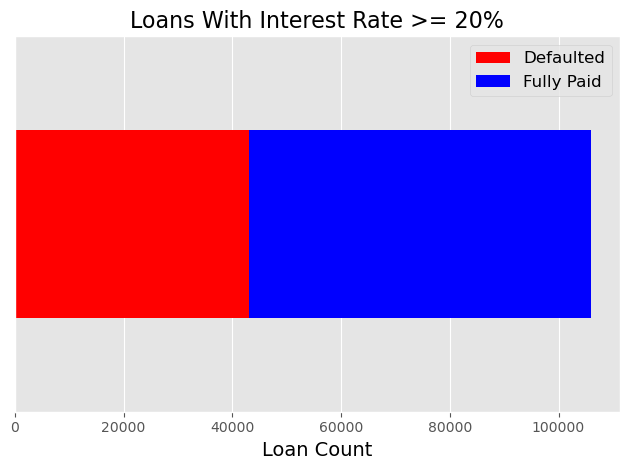

In [14]:
#from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

plt.figure(figsize=(8,4))
plt.style.use('default')
plt.style.use('ggplot')

#y=np.arange(len())

eda[['Defaulted', 'Fully Paid']].plot.barh(stacked=True, 
                                       color={'Defaulted':'Red',
                                              'Fully Paid':'Blue'}
                                       )


plt.title('Loans With Interest Rate >= 20%', fontsize=16, color='black')
plt.xlabel('Loan Count', fontsize=14, color='black')
plt.yticks([])
plt.legend(fontsize=12)
#plt.ticklabel_format(style='plain')

#plt.ylabel('Application Status', fontsize=14, color='blue')

#plt.text(10, 0.98, '9.4%', fontsize=10)

#plt.annotate('90%', xy=(10, 0.25), xytext=(10, 0.25),
            # arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)

#plt.annotate('0.7%', xy=(80000, 0.15), xytext=(90000, 0.25),
#             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)

#plt.margins(x=0.15)
#plt.yticks(fontsize=12)

plt.tight_layout()
plt.show();

In [15]:
top = a.dropna(subset=['loan_status_bin'])
top

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status_bin
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68476807,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.00,1340.50,0.0,0.00,0.0000,Jul-2016,10128.96,NaN,Mar-2018,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1.0
31,68341789,NaN,24250.0,24250.0,24250.0,60 months,24.24,701.01,F,F3,hvac technician,4 years,MORTGAGE,75000.0,Not Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68341789,NaN,debt_consolidation,NaN,114xx,NY,20.84,0.0,Apr-2007,660.0,664.0,0.0,NaN,NaN,18.0,0.0,24799.0,65.3,21.0,w,0.0,0.0,4124.420000,4124.42,1332.69,2791.73,0.0,0.00,0.0000,Jul-2016,701.01,NaN,Mar-2018,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,320098.0,2.0,1.0,0.0,1.0,14.0,13676.0,75.0,2.0,10.0,3138.0,61.0,38000.0,1.0,1.0,3.0,13.0,17783.0,9044.0,68.9,0.0,0.0,93.0,104.0,2.0,2.0,2.0,2.0,NaN,7.0,NaN,0.0,10.0,12.0,11.0,12.0,2.0,15.0,16.0,12.0,18.0,0

In [16]:
#Overall Return On Investment If Invested In All Loans > 20% interes rate ==> -3.6%
top['total_pymnt_inv'].sum() / top['funded_amnt_inv'].sum()

0.9643770437148663